In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom_test, ttest_1samp, chi2_contingency, ttest_ind, f_oneway

In [2]:
FLAT_FILE_DIR = "../flat_files/"

full_table = pd.read_csv(FLAT_FILE_DIR + "full_table.csv")
event_table = pd.read_csv(FLAT_FILE_DIR + "event_table.csv")
deck_list_table = pd.read_csv(FLAT_FILE_DIR + "deck_list_table.csv")
pilot_table = pd.read_csv(FLAT_FILE_DIR + "pilot_table.csv")
deck_table = pd.read_csv(FLAT_FILE_DIR + "deck_table.csv")
card_table = pd.read_csv(FLAT_FILE_DIR + "card_table.csv")

bad_decks = full_table[~full_table["cardId"].str.contains(standard_sets, regex=True)]["deckId"].unique()

len(bad_decks)

In [3]:
# Common Slices
standard_sets = "eld|thb|znr|iko|khm|m21"

first_place_decks = deck_table[(deck_table["rank"] == 1)].copy()
main_decks = full_table[
    (~full_table["name"].isin(["Island", "Mountain", "Forest", "Plains", "Swamp"]))
    & (full_table["slot"] == "md")
    & (full_table["cardId"].str.contains(standard_sets, regex=True))
]

In [4]:
full_table[full_table["name"] == "Thornwood Falls"]

,eventId,name_event,date,deckId,pilotId,name_deck,firstName,lastName,cardId,name,count,color,slot,archetype,category,latest_set
1027,10,Gentry ! @ The Gentry Magic League,2020-10-27,40,40,Sultai Mutate Aggro,Karl,Dewhirst-lister,256iko,Thornwood Falls,3,BRW,md,mutate,sultai,Zendikar Rising
7556,49,Gentry ! @ The Gentry Magic League,2020-10-20,283,40,Sultai Aggro,Karl,Dewhirst-lister,256iko,Thornwood Falls,3,BRW,md,aggro,sultai,Zendikar Rising
11584,77,Gentry ! @ The Gentry Magic League,2020-10-13,436,41,Temur Kick,Jelle,Lauwers,256iko,Thornwood Falls,4,BRW,md,kicker,temur,Zendikar Rising
16265,109,Gentry ! @The Jankyard,2020-10-04,602,39,Golgari Control,Teddie,Andersson,256iko,Thornwood Falls,2,BRW,md,control,golgari,Zendikar Rising
23581,173,Gentry ! @ The Gentry Magic League,2020-09-22,865,273,Temur Control,Alan,Schuer,256iko,Thornwood Falls,2,BRW,md,control,temur,Ikoria
28304,213,Event @ Back to Games,2020-09-10,1041,787,Simic Aggro,Igor,NaN,256iko,Thornwood Falls,4,BRW,md,aggro,simic,Ikoria
61983,437,Gentry ! @ The Gentry Magic League,2020-12-22,2303,480,Dimir Control,Peter,Jönsson,256iko,Thornwood Falls,4,BRW,md,control,dimir,Zendikar Rising
62532,441,Torneo de Fin de año @ tavi79,2020-12-20,2324,1497,5c Sanctum,Francisco,Jose Tejeiro Sanchez,256iko,Thornwood Falls,1,BRW,md,control,5-color,Zendikar Rising
69300,487,"Arena Event @ Taverna Geek (Santos, Brazil)",2021-01-05,2587,1135,Simic Food Midrange,Gustavo,Prol,256iko,Thornwood Falls,4,BRW,md,food,simic,Zendikar Rising
71041,500,Gentry ! @ The Jankyard,2021-01-17,2653,294,Dimir Control,Dirk,Spönemann,256iko,Thornwood Falls,4,BRW,md,control,dimir,Zendikar Rising


In [5]:
deck_table.head()

,deckId,eventId,pilotId,deckUrl,name,rank,archetype,category
0,1,1,3,?e=27938&d=421597&f=ST,Gruul Aggro,1,aggro,gruul
1,2,1,4,?e=27938&d=421598&f=ST,UW Control,2,control,azorius
2,3,2,5,?e=27939&d=421599&f=ST,Red Deck Wins,1,aggro,mono red
3,4,3,6,?e=27940&d=421600&f=ST,Rakdos Aggro,1,aggro,rakdos
4,5,4,7,?e=27925&d=421512&f=ST,Gruul Aggro,1,aggro,gruul


In [6]:
first_place_decks.head()

,deckId,eventId,pilotId,deckUrl,name,rank,archetype,category
0,1,1,3,?e=27938&d=421597&f=ST,Gruul Aggro,1,aggro,gruul
2,3,2,5,?e=27939&d=421599&f=ST,Red Deck Wins,1,aggro,mono red
3,4,3,6,?e=27940&d=421600&f=ST,Rakdos Aggro,1,aggro,rakdos
4,5,4,7,?e=27925&d=421512&f=ST,Gruul Aggro,1,aggro,gruul
12,13,5,15,?e=27918&d=421478&f=ST,Rakdos Control,1,control,rakdos


In [7]:
(event_table.head())

,eventId,name,link,date,latest_set
0,1,FNM @ MTG Arena Campania,https://www.mtgtop8.com/event?e=27938&f=ST,2020-10-30,Zendikar Rising
1,2,Torneios @ Ludo Quest,https://www.mtgtop8.com/event?e=27939&f=ST,2020-10-30,Zendikar Rising
2,3,All Hallow's Eve FNM @ Gamer's Gauntlet,https://www.mtgtop8.com/event?e=27940&f=ST,2020-10-30,Zendikar Rising
3,4,Japan Championship 2020 Autumn Last Chance Tri...,https://www.mtgtop8.com/event?e=27925&f=ST,2020-10-29,Zendikar Rising
4,5,Free Daily @ Owl Central Games,https://www.mtgtop8.com/event?e=27918&f=ST,2020-10-28,Zendikar Rising


In [8]:
full_table.head()

,eventId,name_event,date,deckId,pilotId,name_deck,firstName,lastName,cardId,name,count,color,slot,archetype,category,latest_set
0,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,261znr,Cragcrown Pathway // Timbercrown Pathway,4,GR,md,aggro,gruul,Zendikar Rising
1,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,244eld,Fabled Passage,4,NaN,md,aggro,gruul,Zendikar Rising
2,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,266eld,Forest,9,G,md,aggro,gruul,Zendikar Rising
3,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,262eld,Mountain,5,R,md,aggro,gruul,Zendikar Rising
4,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,115eld,Bonecrusher Giant // Stomp,4,R,md,aggro,gruul,Zendikar Rising


In [9]:
def most_winning_archetypes():
    first_place_decks.loc[first_place_decks["archetype"] == "rogue", "archetype"] = "mill"
    grouped_archetypes = first_place_decks.groupby("archetype")["rank"].sum().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
#     sns.barplot(data=grouped_archetypes, x="archetype", y="rank")
    plt.bar(range(len(grouped_archetypes)), grouped_archetypes["rank"])
    plt.xticks(range(len(grouped_archetypes)), grouped_archetypes["archetype"], rotation=30)
    plt.title("Most Winning Archetypes")
    plt.show()

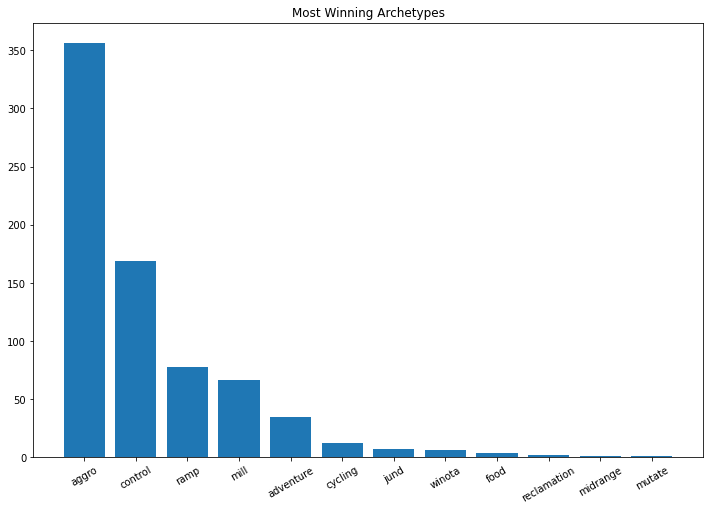

In [10]:
most_winning_archetypes()

In [11]:
def most_winning_colors():
    grouped_category = first_place_decks.groupby("category")["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_category, x="category", y="rank")
    plt.title("Most Winning Colors")
    plt.xticks(rotation=30)
    plt.show()

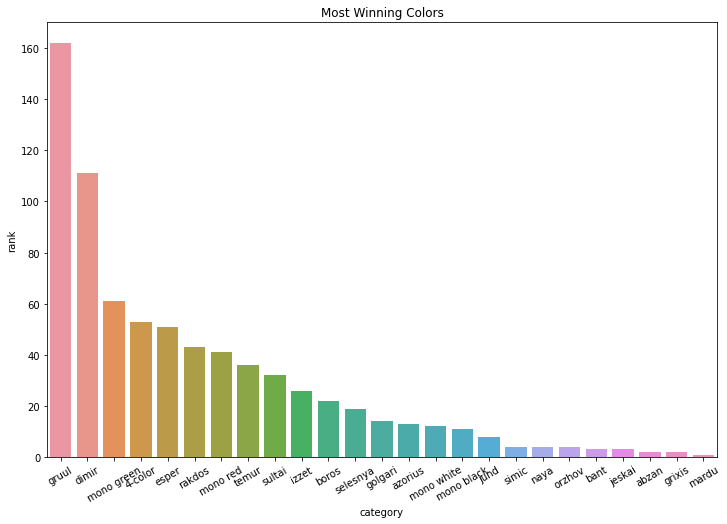

In [12]:
most_winning_colors()

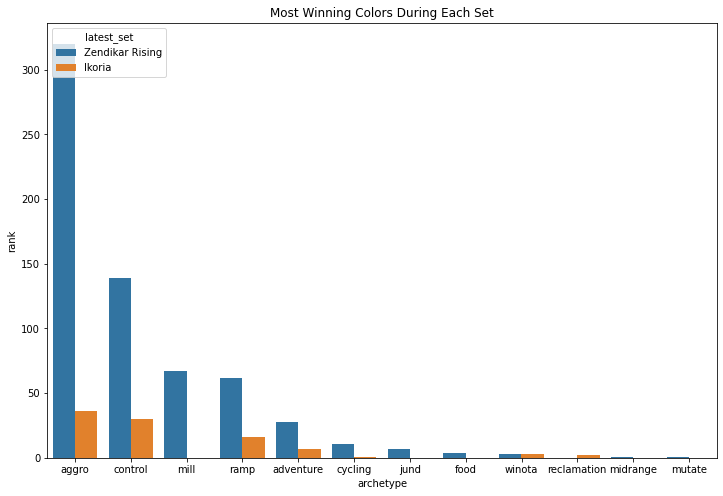

In [13]:
def most_winning_colors_by_set():
    merged_table = first_place_decks.merge(event_table[["eventId", "latest_set"]], on="eventId", suffixes=[None, "_event"])
    grouped_table = merged_table.groupby(["archetype", "latest_set"])["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_table, x="archetype", y="rank", hue="latest_set")
    plt.title("Most Winning Colors During Each Set")
    plt.show()

most_winning_colors_by_set()

In [55]:
def what_colors_go_with_archetype(archetypes, colors):
    archetypes = deck_table[deck_table["archetype"].isin(archetypes)]["archetype"]
    colors = deck_table[deck_table["category"].isin(colors)]["category"]
    frequencies = pd.crosstab(archetypes, colors)
    chi2, pval, _, expected = chi2_contingency(frequencies)
    return chi2, pval, frequencies, expected

what_colors_go_with_archetype(["aggro", "control"], ["mono black", "gruul"])

(106.09353233830846,
 7.033581500419695e-25,
 category   gruul  mono black
 archetype                   
 aggro        510          26
 control        0           8,
 array([[5.025e+02, 3.350e+01],
        [7.500e+00, 5.000e-01]]))

In [40]:
def colors_and_archetypes(archetype):
    first_place_archetype = first_place_decks[first_place_decks["archetype"] == archetype].copy()
    grouped_table = first_place_archetype.groupby("category")["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(data=grouped_table, x="category", y="rank")
    plt.title(f"Categories in the Most Winning {archetype.title()} Decks")
    plt.xticks(rotation=30)
    plt.show()

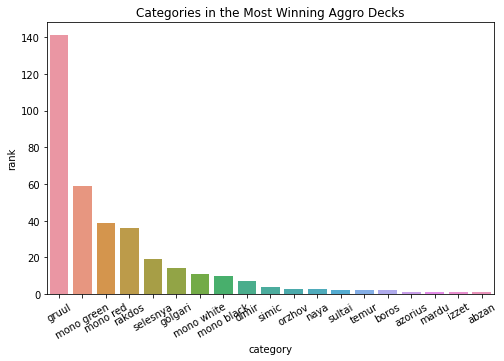

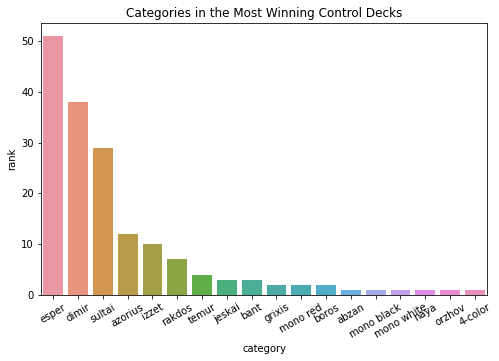

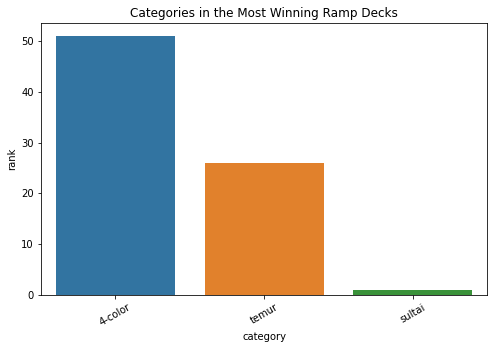

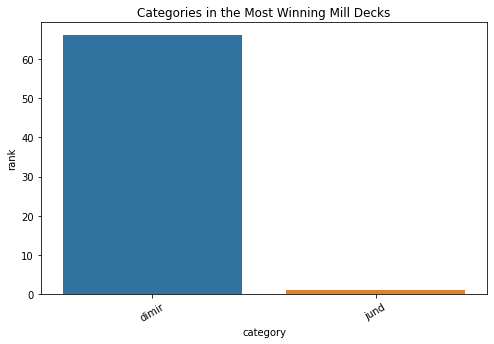

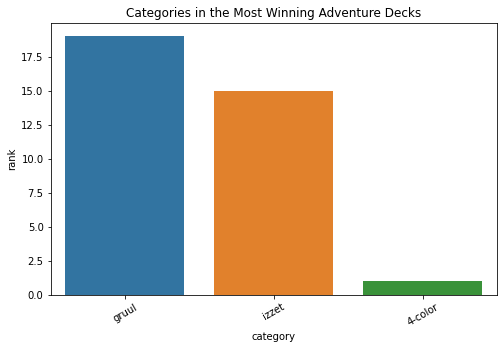

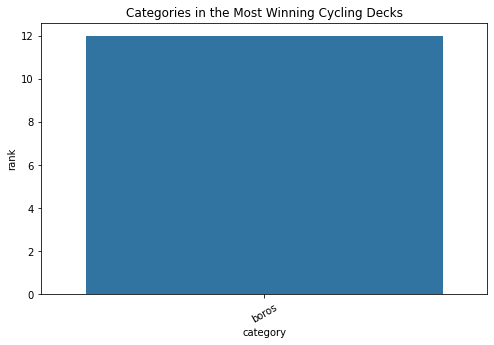

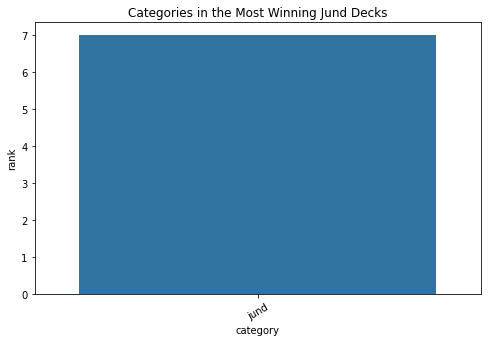

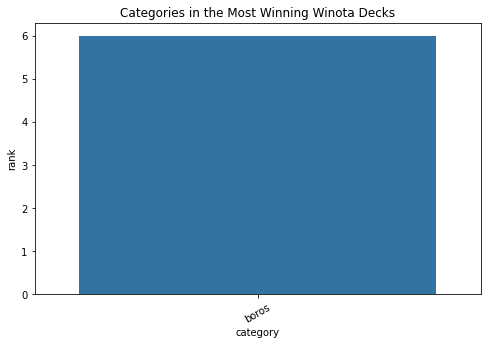

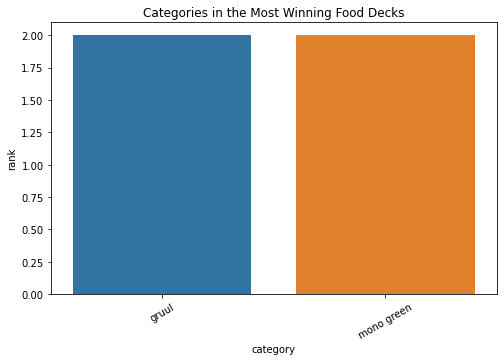

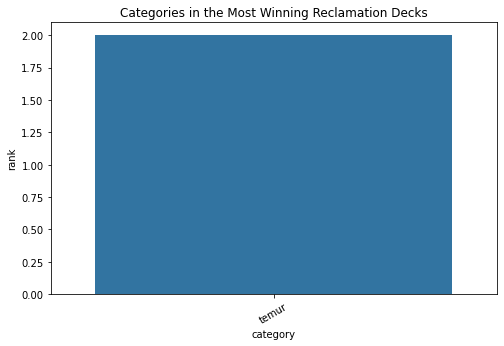

In [16]:
def top10_colors_archetypes():
    top10_archetypes = first_place_decks["archetype"].value_counts().index[:10].tolist()
    for archetype in top10_archetypes:
        colors_and_archetypes(archetype)
#         plt.clf()

top10_colors_archetypes()

In [17]:
deck_table[deck_table["archetype"] == "rogue"]["name"].value_counts()

Dimir Rogue         84
Dimir Rogue/mill     1
Ub Rogue             1
Dimir Rogues         1
Name: name, dtype: int64

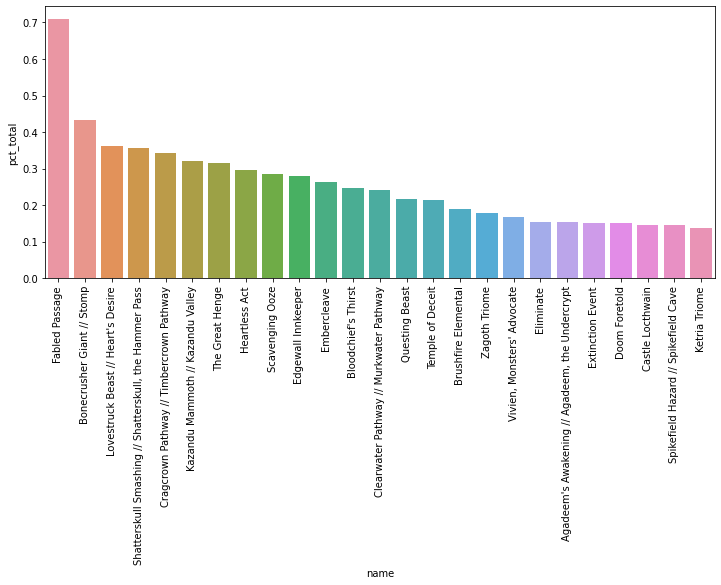

In [18]:
def most_used_cards():
    this_full_table = main_decks.copy()
    grouped_table = this_full_table.groupby("name")["deckId"].nunique().reset_index().sort_values(by="deckId", ascending=False)
    grouped_table["pct_total"] = grouped_table["deckId"].div(this_full_table["deckId"].nunique())
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_table.iloc[:25], x="name", y="pct_total")
    plt.xticks(rotation=90)
    plt.show()
    
most_used_cards()

In [19]:
def most_used_cards_in_archetype(archetype):
    this_df = main_decks[main_decks["archetype"] == archetype].copy()
    grouped_df = (
        this_df.groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_df["pct_total"] = grouped_df["deckId"] / this_df["deckId"].nunique()
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_df.iloc[:30], x="name", y="pct_total")
    plt.xticks(rotation=90)
    plt.title(f"Most Used Cards in {archetype.title()} Decks")
    plt.show()

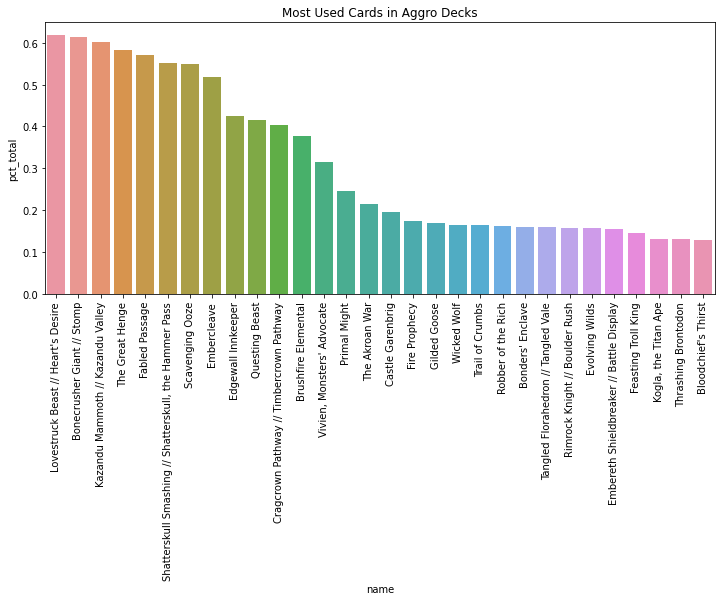

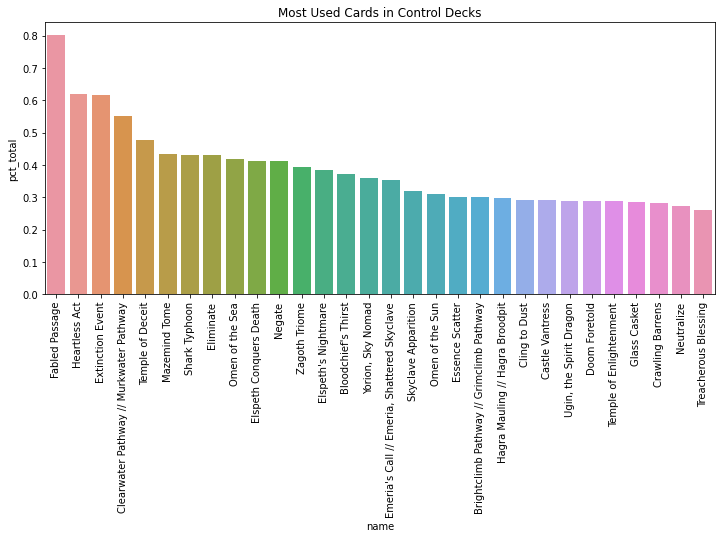

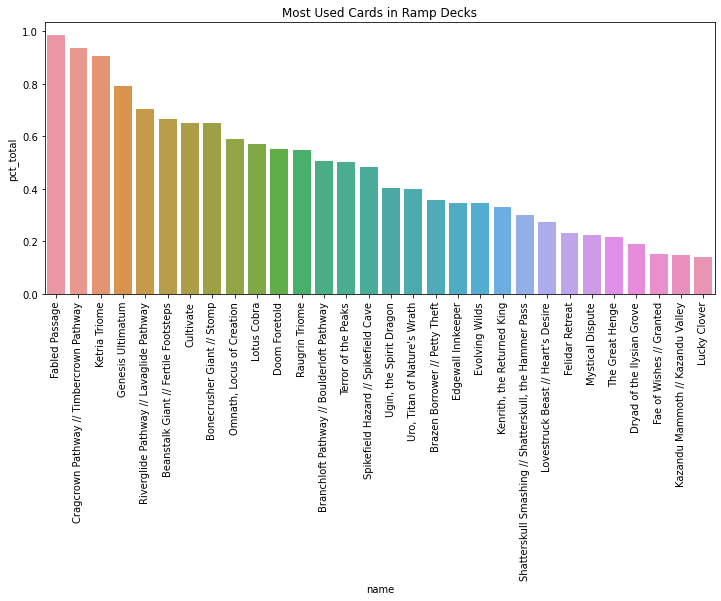

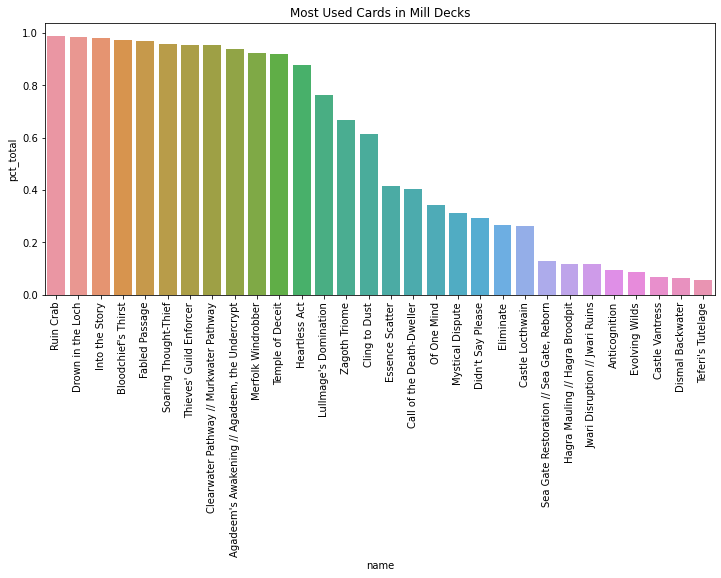

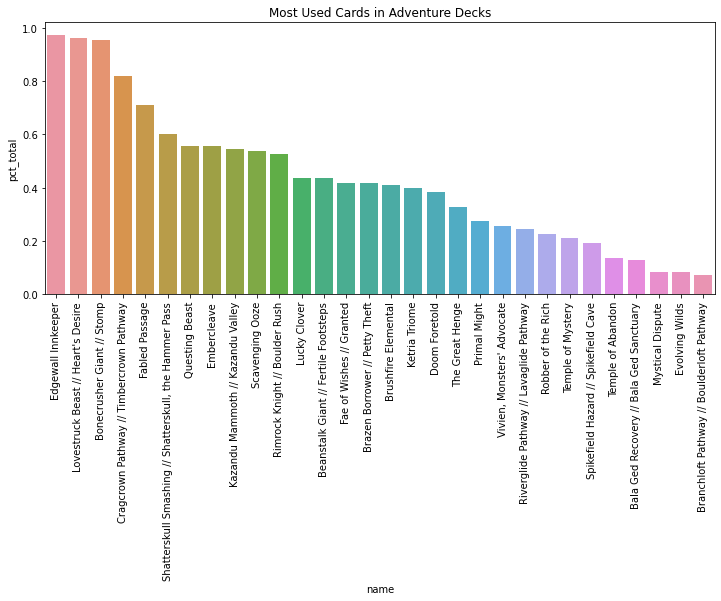

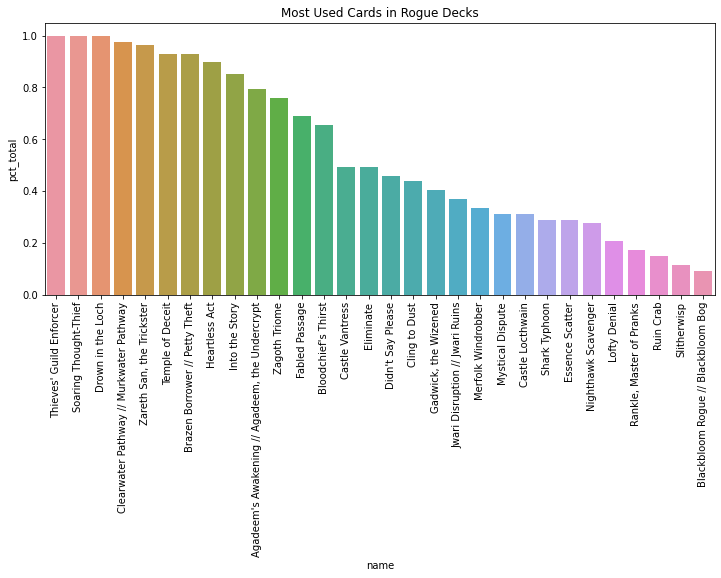

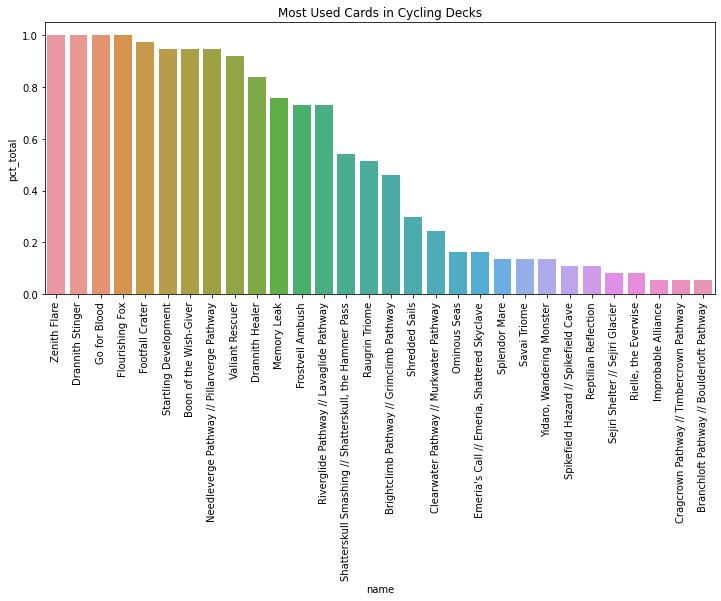

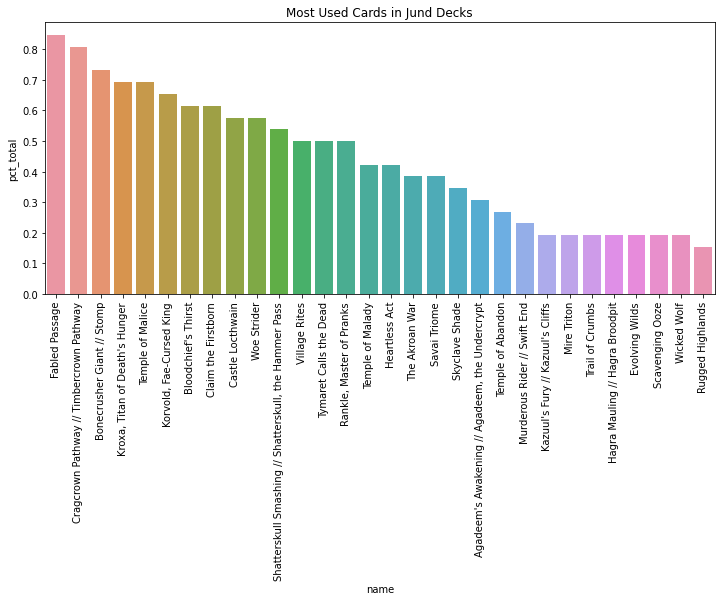

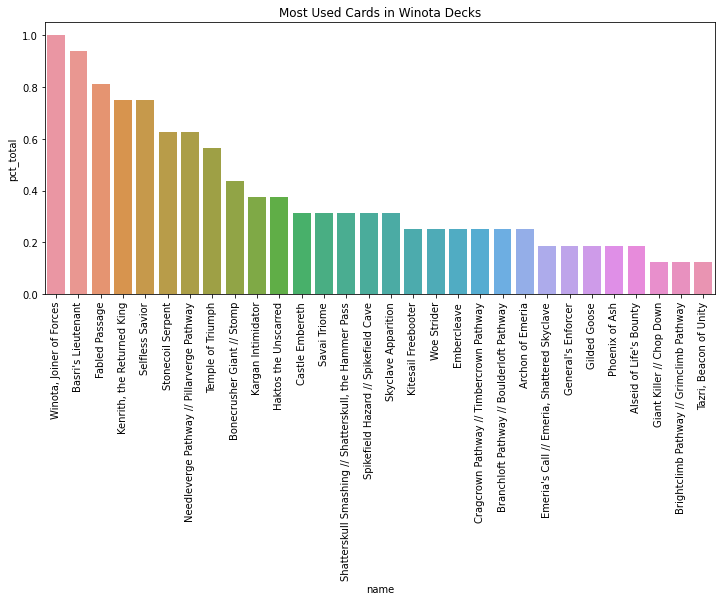

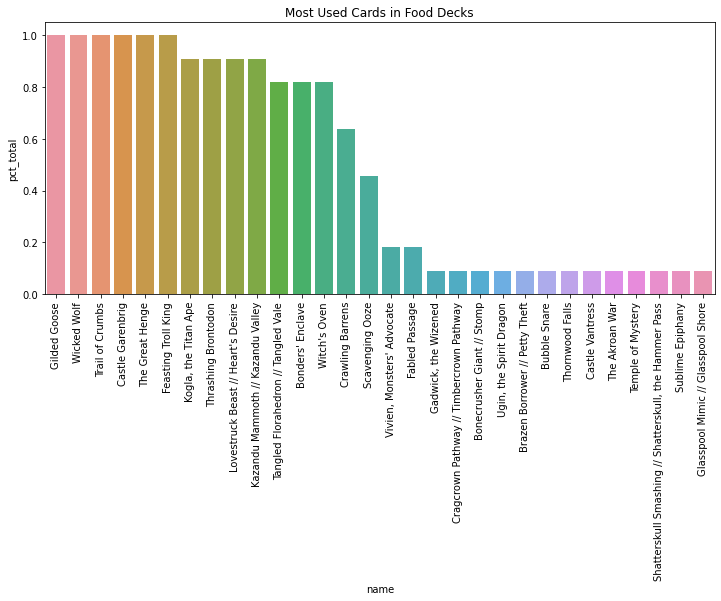

In [20]:
def top_10_archetypes():
    top_10_archetypes = deck_table["archetype"].value_counts().index[:10]
    for archetype in top_10_archetypes:
        most_used_cards_in_archetype(archetype)

top_10_archetypes()

In [21]:
def most_used_cards_in_category(category):
    this_df = main_decks[main_decks["category"] == category].copy()
    grouped_df = (
        this_df.groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_df["pct_total"] = grouped_df["deckId"] / this_df["deckId"].nunique()
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_df.iloc[:25], x="name", y="pct_total")
    plt.title(f"The Top Cards for {category.title()} Decks")
    plt.xticks(rotation=90)
    plt.show()

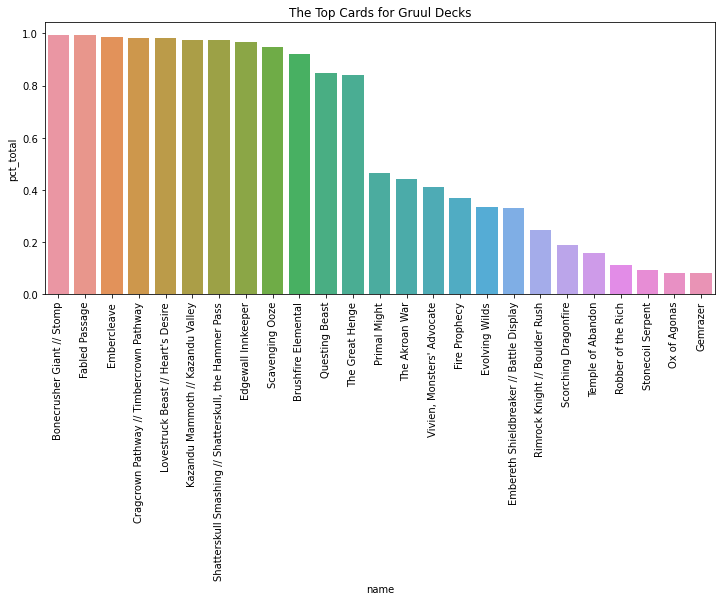

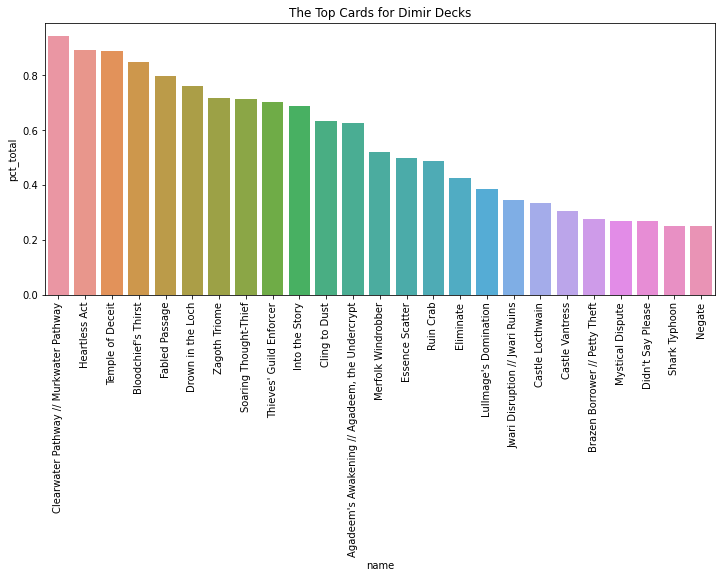

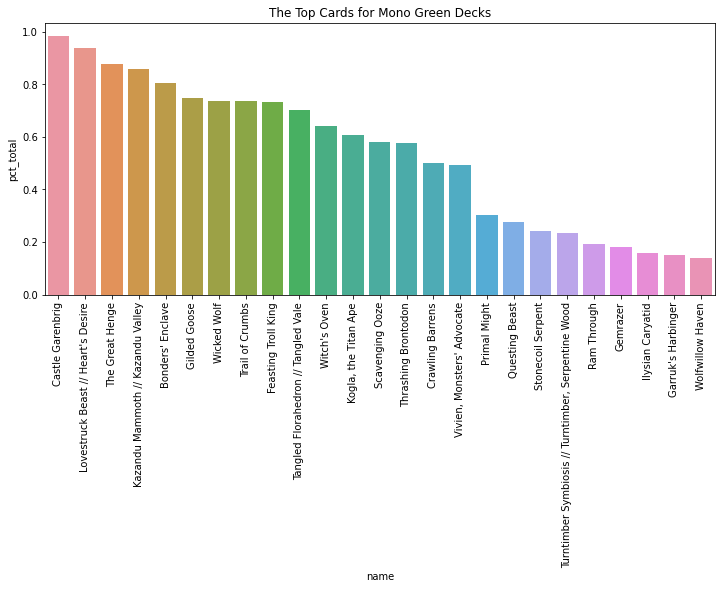

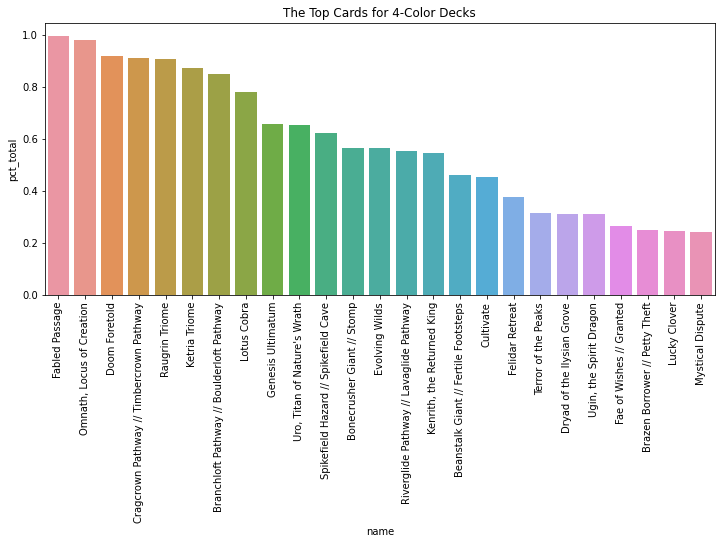

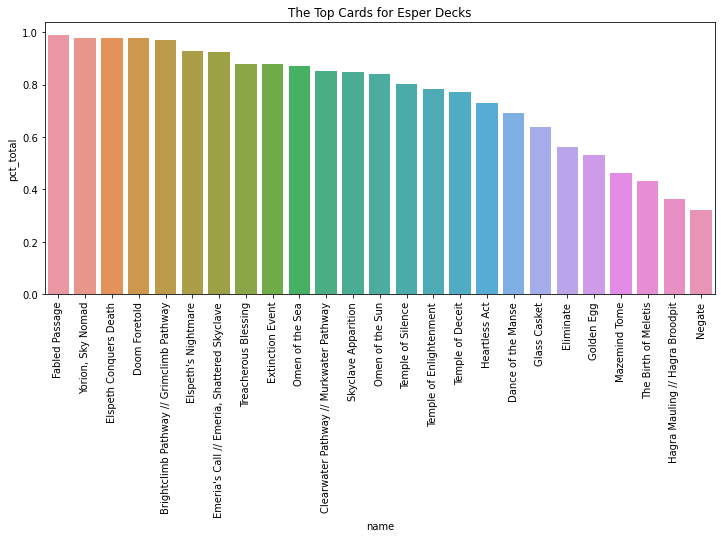

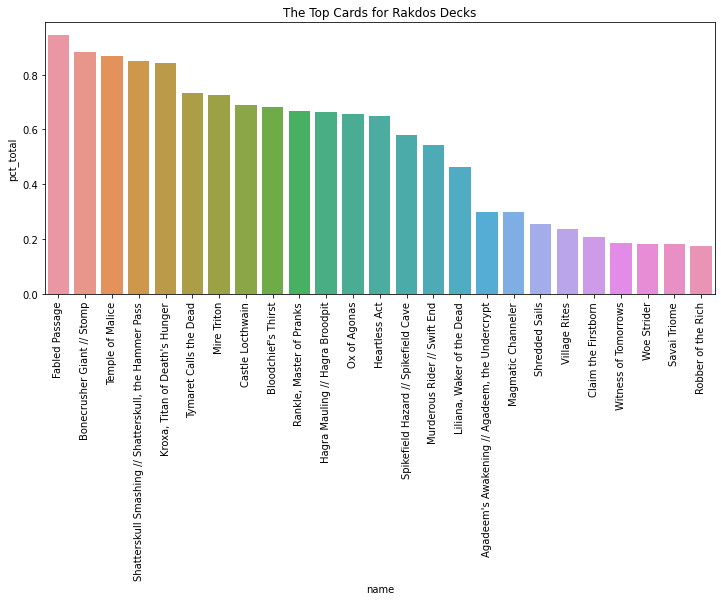

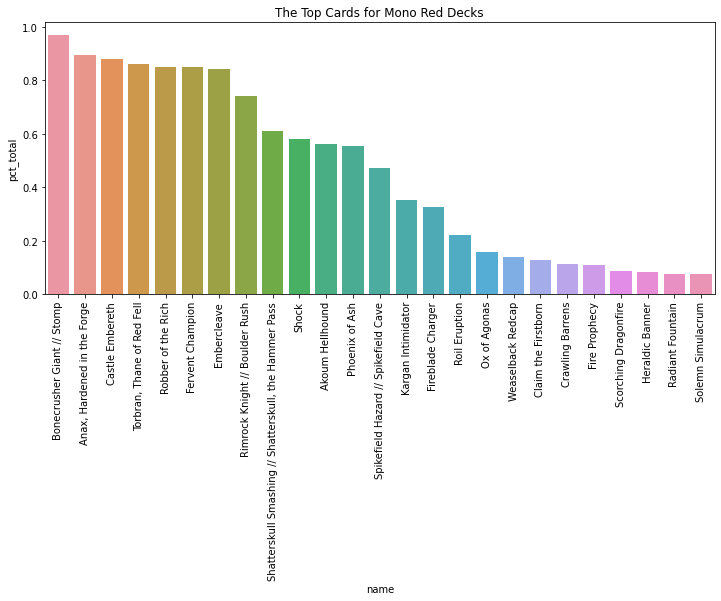

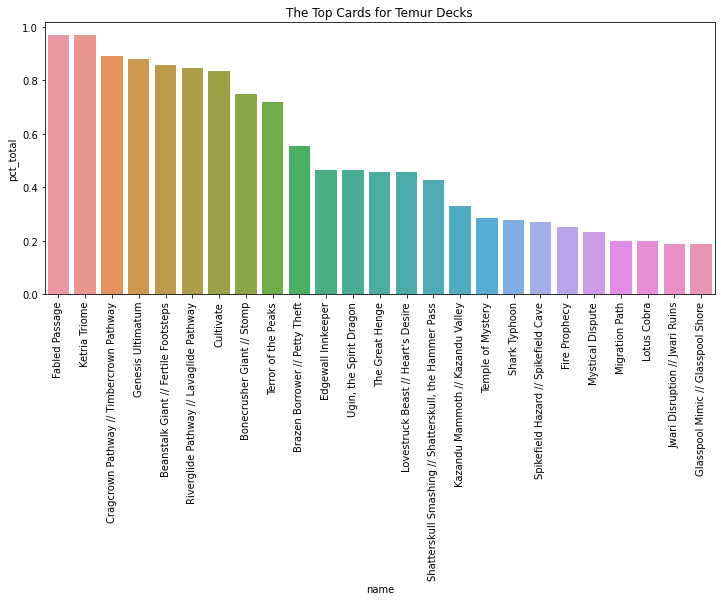

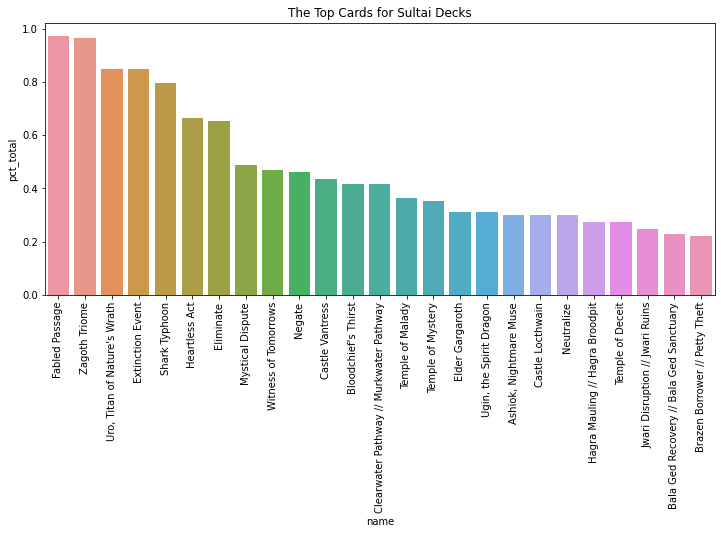

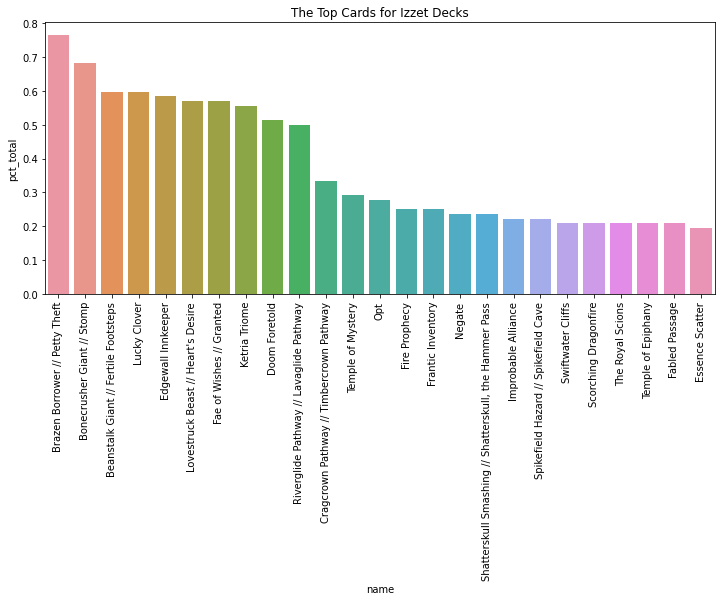

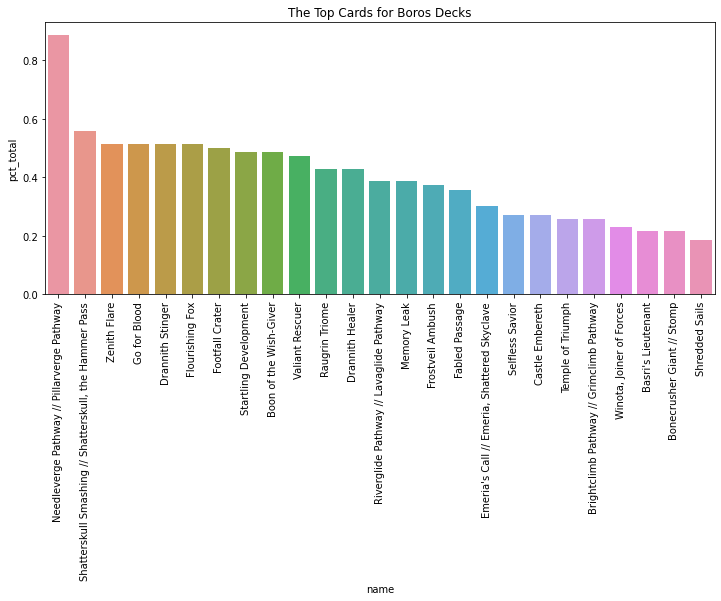

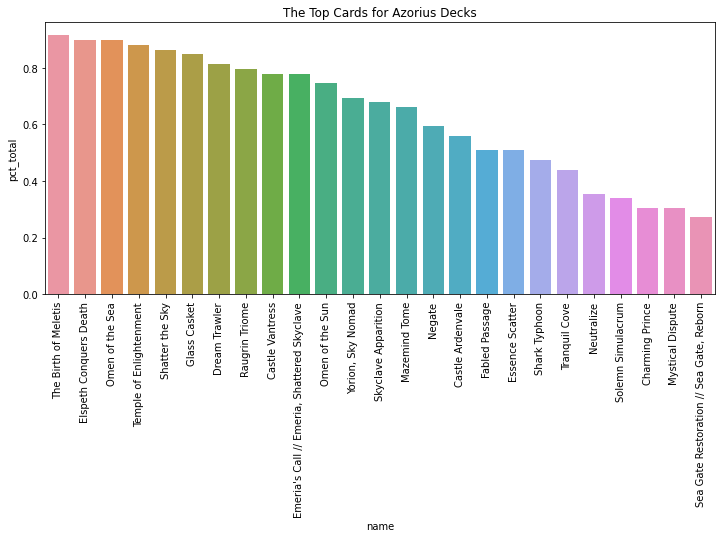

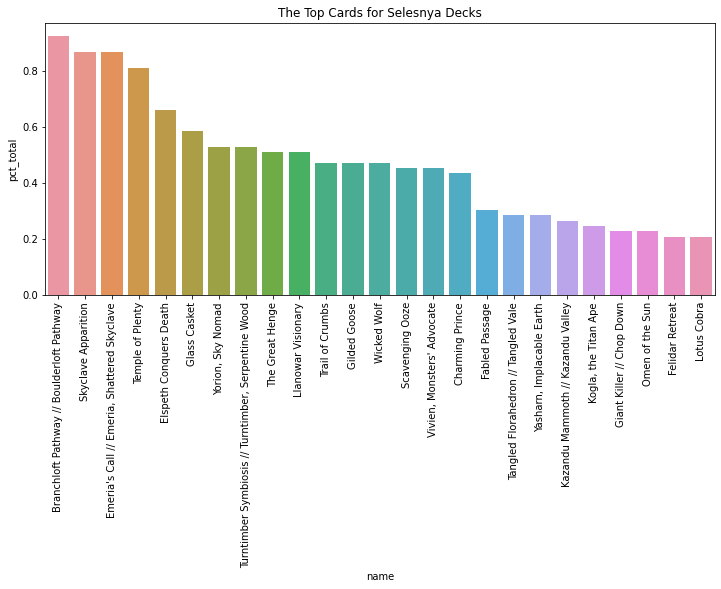

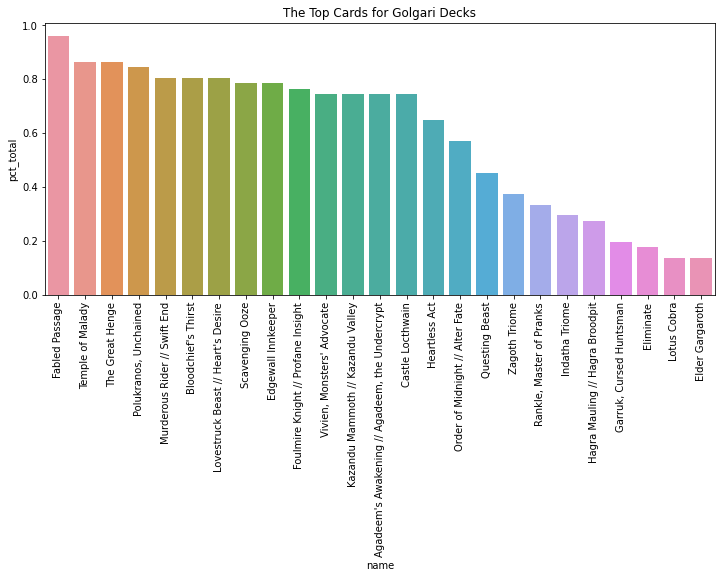

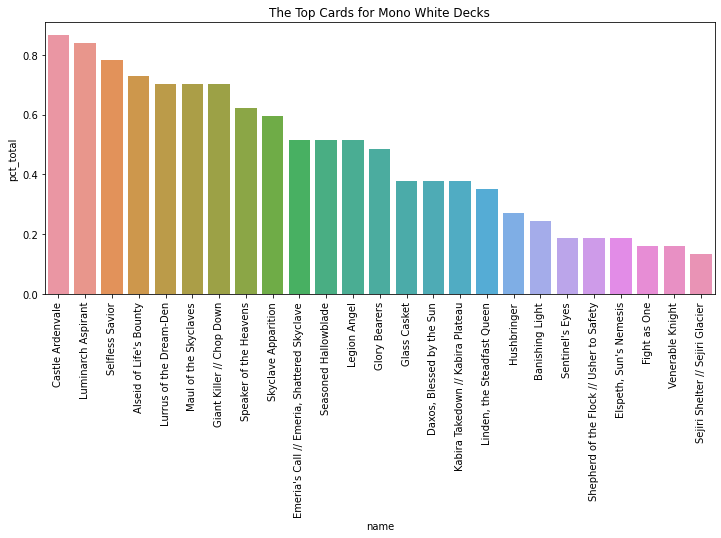

In [22]:
def top_15_categories():
    top_15_categories = deck_table["category"].value_counts().index[:15]
    for category in top_15_categories:
        most_used_cards_in_category(category)

top_15_categories()

In [30]:
def cards_per_deck_by_set(unique_cards=False):
    this_df = main_decks[main_decks["deckId"].isin(first_place_decks["deckId"])].copy()
    if unique_cards:
        this_df.drop_duplicates(subset="name", inplace=True)
    this_df["set"] = this_df["cardId"].str.extract(r"(\d{3})(\w{3})")[1]
    sns.countplot(x=this_df["set"], order=this_df["set"].value_counts().index)
    plt.show()
    

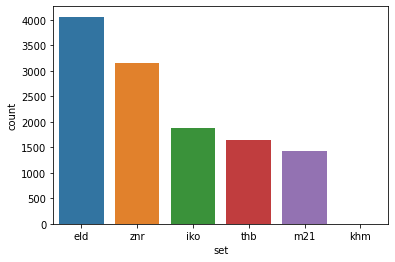

In [31]:
cards_per_deck_by_set()

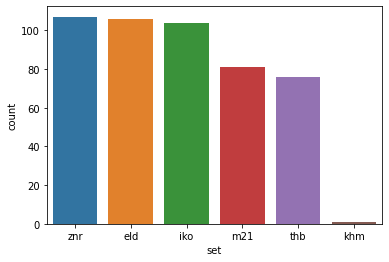

In [33]:
cards_per_deck_by_set(unique_cards=True)

In [58]:
deck_table[["rank", "category"]]

,rank,category
0,1,gruul
1,2,azorius
2,1,mono red
3,1,rakdos
4,1,gruul
...,...,...
2774,3,mono green
2775,1,boros
2776,2,abzan
2777,1,boros


In [61]:
gruul_rank = deck_table["rank"][deck_table["category"] == "gruul"]
mono_red_rank = deck_table["rank"][deck_table["category"] == "mono red"]
tstat, pval = ttest_ind(gruul_rank, mono_red_rank)

In [62]:
pval

0.8123479196663743

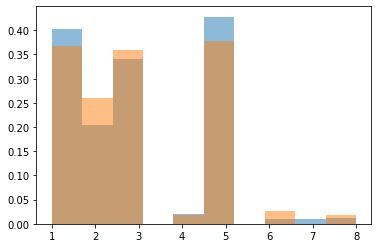

In [67]:
plt.hist(gruul_rank, density=True, alpha=0.5)
plt.hist(mono_red_rank, density=True, alpha=0.5)
plt.show()

In [68]:
esper_rank = deck_table["rank"][deck_table["category"] == "esper"]
ttest,pval = ttest_ind(gruul_rank, esper_rank)

In [69]:
pval

0.34521834346554037

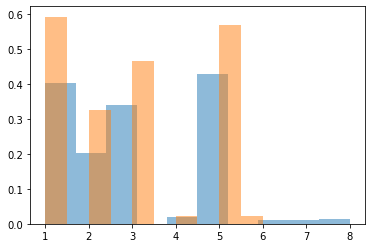

In [70]:
plt.hist(gruul_rank, density=True, alpha=0.5)
plt.hist(esper_rank, density=True, alpha=0.5)
plt.show()

In [71]:
mean_gruul_rank = np.mean(gruul_rank)
mean_mono_red_rank = np.mean(mono_red_rank)
mean_esper_rank = np.mean(esper_rank)

print(mean_gruul_rank)
print(mean_mono_red_rank)
print(mean_esper_rank)

2.9982578397212545
2.9622641509433962
2.86046511627907


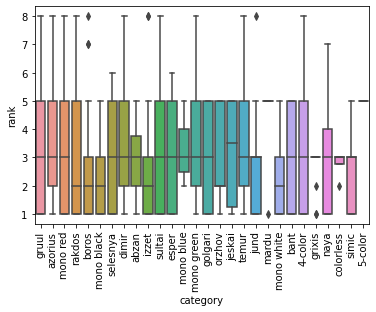

In [74]:
sns.boxplot(data=deck_table, x="category", y="rank")
plt.xticks(rotation=90)
plt.show()